Name: **Luong Nguyen**  
Student ID: **1504210**  

## Introduction to Deep Learning 

### Session03: regularization vs. dropout fashion-MNIST
____

**Import the packages needed for this assignment**

In [1]:
# import packages
import numpy as np
from keras import models, layers, regularizers
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


**Load data**

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

**Explore data**

In [3]:
print("x_train shape: %s" % (str(x_train.shape)))
print("y_train shape: %s" % (str(y_train.shape)))
print("x_test shape: %s" % (str(x_test.shape)))
print("y_test shape: %s" % (str(y_test.shape)))

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [4]:
images_indices = []
# get the first index of every class label 
for i in range(10):
    images_indices.append(np.argwhere(y_train == i)[0].item())
images_indices

[1, 16, 5, 3, 19, 8, 18, 6, 23, 0]

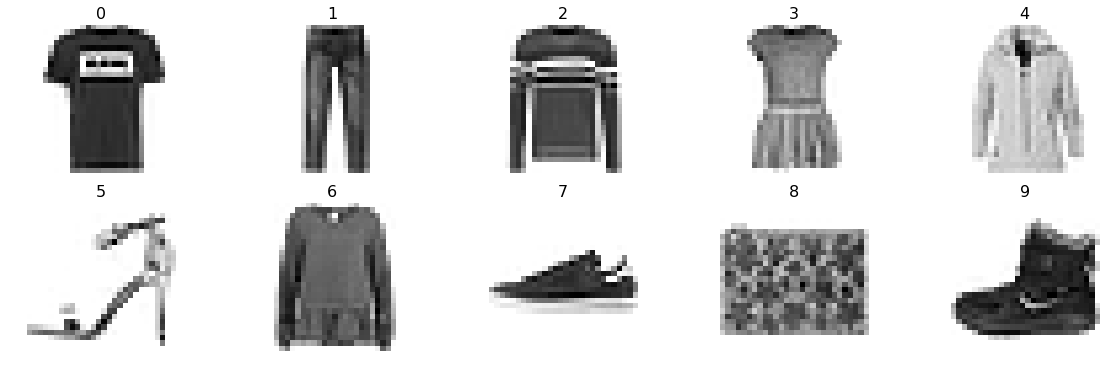

In [5]:
# plot example of every class label
rows = 2
f = plt.figure(figsize=(20,6))
for i in range(len(images_indices)):
    sp = f.add_subplot(rows, len(images_indices)//rows, i+1)
    sp.axis('Off')
    sp.set_title(y_train[images_indices[i]], fontsize=16)
    plt.imshow(x_train[images_indices[i]], cmap=plt.cm.binary)        

**Preprocess data**

In [6]:
# unroll image into a vector
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# scaling all values into [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# categorically encode the labels
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
# Data shape after preprocessing
print("x_train shape: %s" % (str(x_train.shape)))
print("y_train shape: %s" % (str(y_train.shape)))
print("x_test shape: %s" % (str(x_test.shape)))
print("y_test shape: %s" % (str(y_test.shape)))

print("\nA sample of y_train: %s" % (str(y_train[2])))

x_train shape: (60000, 784)
y_train shape: (60000, 10)
x_test shape: (10000, 784)
y_test shape: (10000, 10)

A sample of y_train: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


**Train with an overfitting network from session 2**

In [9]:
original_model = models.Sequential()
original_model.add(layers.Dense(512, input_shape=(28 * 28,), activation='relu'))
original_model.add(layers.Dense(512, activation='relu'))
original_model.add(layers.Dense(10, activation='softmax'))

In [10]:
original_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
original_hist = original_model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test,y_test), verbose=0)

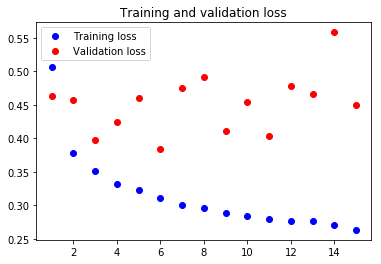

In [11]:
original_loss = original_hist.history['loss']
original_val_loss = original_hist.history['val_loss']
epochs = range(1, len(original_loss) + 1)

plt.figure()
plt.plot(epochs, original_loss, 'bo', label='Training loss')
plt.plot(epochs, original_val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

This network starts overfitting after just 3 epochs, and the validation loss is noisy.

**Train with a smaller network**

In [13]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(50, input_shape=(28 * 28,), activation='relu'))
smaller_model.add(layers.Dense(50, activation='relu'))
smaller_model.add(layers.Dense(10, activation='softmax'))

In [14]:
smaller_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
smaller_hist = smaller_model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test,y_test), verbose=0)

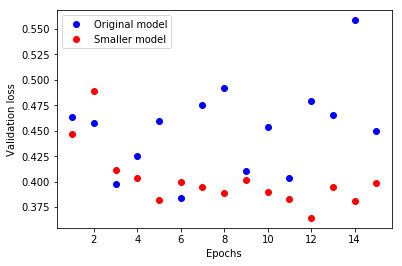

In [15]:
smaller_loss = smaller_hist.history['loss']
smaller_val_loss = smaller_hist.history['val_loss']
epochs = range(1, len(smaller_loss) + 1)

plt.figure()
plt.plot(epochs, original_val_loss, 'bo', label='Original model')
plt.plot(epochs, smaller_val_loss, 'ro', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

The smaller network starts overfitting later than the original one (after 5 epochs rather than 3) and its validation loss is noisier. With the smaller network we also get a smaller validation loss value.

**Adding weight regularization**

L1 regularization

In [16]:
l1_model = models.Sequential()
l1_model.add(layers.Dense(50, kernel_regularizer=regularizers.l1(0.001),
                          activation='relu', input_shape=(28 * 28,)))
l1_model.add(layers.Dense(50, kernel_regularizer=regularizers.l1(0.001),
                          activation='relu'))
l1_model.add(layers.Dense(10, activation='softmax'))

In [17]:
l1_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
l1_model_hist = l1_model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test), verbose=0)

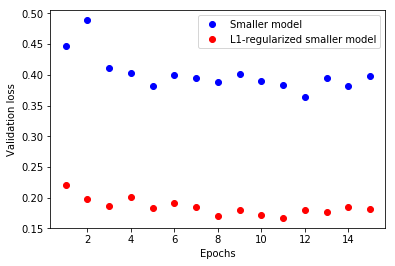

In [18]:
l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs, smaller_val_loss, 'bo', label='Smaller model')
plt.plot(epochs, l1_model_val_loss, 'ro', label='L1-regularized smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

L2 regularization

In [19]:
l2_model = models.Sequential()
l2_model.add(layers.Dense(50, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(28 * 28,)))
l2_model.add(layers.Dense(50, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(10, activation='softmax'))

In [20]:
l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
l2_model_hist = l2_model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test), verbose=0)

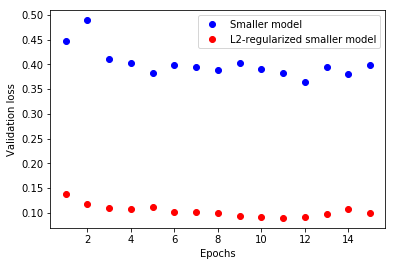

In [21]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, smaller_val_loss, 'bo', label='Smaller model')
plt.plot(epochs, l2_model_val_loss, 'ro', label='L2-regularized smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Adding weight regularization significantly reduces validation losses. Also, L2 regularization works better than L1 in this case.

**Adding dropout**

In [22]:
dropout_model = models.Sequential()
dropout_model.add(layers.Dense(50, input_shape=(28 * 28,), activation='relu'))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(50, activation='relu'))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(10, activation='softmax'))

In [23]:
dropout_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
dropout_hist = dropout_model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test,y_test), verbose=0)

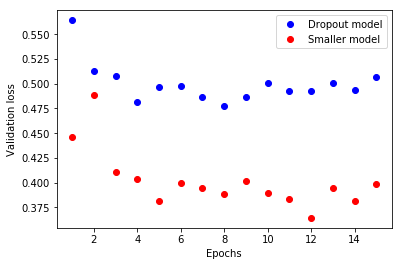

In [24]:
dropout_loss = dropout_hist.history['loss']
dropout_val_loss = dropout_hist.history['val_loss']

plt.figure()
plt.plot(epochs, dropout_val_loss, 'bo', label='Dropout model')
plt.plot(epochs, smaller_val_loss, 'ro', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Adding dropout surprisingly did not help in this case. 